<a href="https://colab.research.google.com/github/zziziz/2025-1-BDA/blob/main/inclass/13w_A_mon_0609_easy_ch10_text_mining_BTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##13주 BTS댓글 워드 클라우드|

In [9]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.7 MB/s eta 0:00:00


In [10]:
import koreanize_matplotlib

In [17]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 23.5 MB/s eta 0:00:00


In [3]:
!find / -name 'koreanlize_matplotlib.py'

find: ‘/proc/72/task/72/net’: Invalid argument
find: ‘/proc/72/net’: Invalid argument
find: ‘/proc/771’: No such file or directory


In [94]:
FONT_PATH = '/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf'


In [5]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [7]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 5.71 MiB | 5.34 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [8]:
df = pd.read_csv('data/news_comment_BTS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [65]:
df.reply[:10]

,reply
0,국보소년단
1,아줌마가들어도좋더라
2,팩트체크현재빌보드위방탄소년단위위위위위위위위위
3,방탄소년단이한국사람이라너무자랑스러워요우리오래오래함께하자
4,대단한월드클래스는다르네좋은소식응원해요
5,정국오빠생일과더불어빌보드위기사라니축제구나
6,정말축하하고응원하지만집에서여러계정으로스트리밍돌리고사재기하고다른팬덤테러하는애들은개념보...
7,기자는자고일어났지만팬들은못자고발표기다림
8,자랑스럽다축하합니다
9,늘응원하고사랑합니다


In [73]:
df.sample(5)

,reg_time,reply,press,title,url
409,2020-09-01 13:51:35,자랑스럽다아아아아아,문화일보,BTS ‘다이너마이트’ 터졌다… 한국가수 첫 빌보드싱글 1위,https://news.naver.com/main/read.nhn?mode=LSD&...
33,2020-09-01 07:55:15,가진것하나없던시절에서이제는세계정상영화보다도영화같다,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
663,2020-09-01 08:15:48,대박방탄소년단축하해요아미축하해요,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...
731,2020-09-01 03:27:07,내가수진짜너무자랑스럽다,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...
222,2020-09-01 07:29:14,이놈은가문통과얼마나가까운사인지모르는놈이군,중앙일보,BTS '다이너마이트' 터졌다···韓 가수 최초 빌보드 싱글1위,https://news.naver.com/main/read.nhn?mode=LSD&...


In [14]:
df['reply'].str.replace('[^가-힣]', '', regex=True)

,reply
0,국보소년단
1,아줌마가들어도좋더라
2,팩트체크현재빌보드위방탄소년단위위위위위위위위위
3,방탄소년단이한국사람이라너무자랑스러워요우리오래오래함께하자
4,대단한월드클래스는다르네좋은소식응원해요
...,...
1195,역시
1196,우리탄이들너무자랑스럽고사랑해
1197,이런애들꼭군대를보내는게맞을까요
1198,군면제급이다이건


In [16]:
df['reply'] = df['reply'].str.replace('[^가-힣]', '', regex=True)
df['reply'].sample(5)

,reply
80,군대나빨리가라
406,요즘울나라에좋은소식들이없는데진짜대단하네요축하합니다
178,정말대단국위선양군면제해야
413,끝물이라던새기들이거보면서먼생각할까
158,고생하셨어요박수


In [18]:
from konlpy.tag import Hannanum
han = Hannanum() #명사만 꺼냄
han.nouns('질문이나 건의사항은 깃허브 이슈 트레커에 남겨주세요')

['질문', '건의사항', '깃허브', '이슈', '트레커']

In [22]:
from konlpy.tag import Kkma
Kkma = Kkma() #명사만 꺼냄
han.nouns('질문이나 건의사항은 깃허브 이슈 트레커에 남겨주세요')

['질문', '건의사항', '깃허브', '이슈', '트레커']

In [23]:
mydf = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
mydf

,A,B
0,1,4
1,2,5
2,3,6


In [25]:
dfs = mydf.apply(lambda x:x**2)
dfs

,A,B
0,1,16
1,4,25
2,9,36


In [28]:
dfs = mydf.apply(lambda x:x+2)
dfs

,A,B
0,3,6
1,4,7
2,5,8


In [30]:
nouns = df['reply'].apply(Kkma.nouns)
nouns

,reply
0,"[국보, 국보소년단, 소년단]"
1,[아줌마]
2,"[위, 팩트, 방탄, 소년, 팩트체크, 소년단위, 위위위위, 체크, 보드, 단위, ..."
3,"[방탄, 한국, 자랑, 소년단, 한국사람, 사람, 우리, 하자]"
4,"[월드, 클래스, 소식, 소식응원, 응원]"
...,...
1195,[]
1196,"[우리, 이, 자랑, 사랑]"
1197,"[애, 군대]"
1198,"[군, 군면제급, 면제, 급, 다이, 다이건, 건]"


In [31]:
nouns = nouns.explode()
nouns

,reply
0,국보
0,국보소년단
0,소년단
1,아줌마
2,위
...,...
1199,남
1199,박지
1199,전
1199,전정국


In [32]:
test = pd.DataFrame({'A': [[1, 2, 3], 'foo', [], [3, 4]], 'B': 1,
                     'C':[['a', 'b', 'c'], np.nan, [], ['d', 'e']]})
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [33]:
#기말시험 예상
test.explode('A') #A에 있는 데이터값(배열)들을  하나하나 다 따로 나열

,A,B,C
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
0,3,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [34]:
#기말시험 예상
test.explode(['A', 'C']) #A,C에 값의 개수에 맞춰 알맞게 배열, 개수가 맞지않다면 에러

,A,B,C
0,1,1,a
0,2,1,b
0,3,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


In [45]:
df_word = pd.DataFrame({'word':nouns})
df_word.sample(5)

,word
681,아미
394,군
327,자랑
291,노래
978,기사


In [46]:
df_word['len'] = df_word['word'].str.len()
df_word = df_word.query('len >=2')
df_word.sample(5)

,word,len
920,키즈,2.0
802,축하해방,4.0
214,세계문화대통령,7.0
397,요즘,2.0
622,대박대박,4.0


In [58]:
df_word.query('word == "소년단"')

,word,len
0,소년단,3.0
3,소년단,3.0
27,소년단,3.0
29,소년단,3.0
64,소년단,3.0
...,...,...
1123,소년단,3.0
1159,소년단,3.0
1162,소년단,3.0
1164,소년단,3.0


In [60]:
df_word = df_word.groupby('word', as_index=False)\
.agg(n = ('word', 'count'))\
.sort_values('n', ascending=False)
df_word.sample(5)
df_word

,word,n
1075,방탄,270
2562,축하,210
2164,자랑,197
1434,소년단,133
1169,보드,131
...,...,...
2916,히트곡하나,1
2917,히트침,1
2919,힘내,1
2920,힘내서,1


In [62]:
top20 = df_word.head(20)
top20

,word,n
1075,방탄,270
2562,축하,210
2164,자랑,197
1434,소년단,133
1169,보드,131
907,면제,114
1881,우리,66
319,군대,66
15,가수,57
298,국위,56


<Axes: xlabel='n', ylabel='word'>

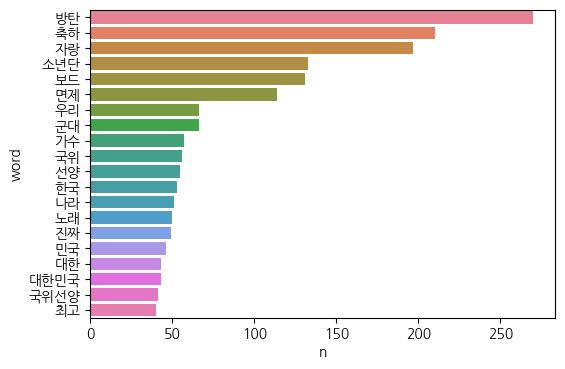

In [77]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top20, y='word', x='n', hue='word')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
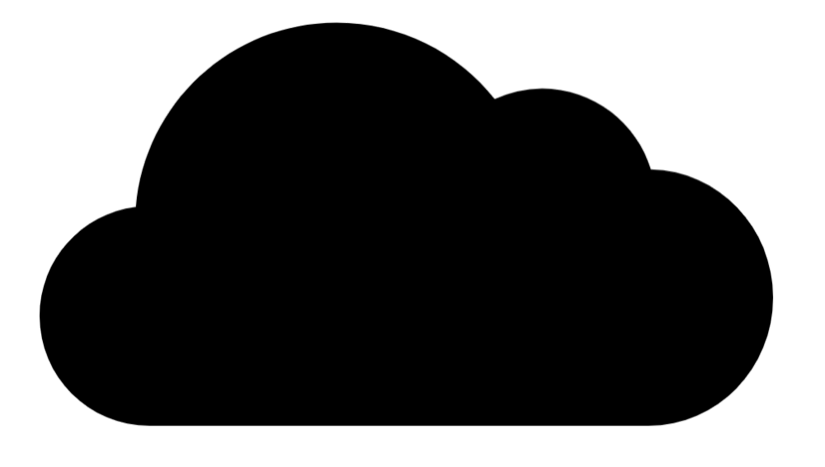

In [80]:
from PIL import Image
icon = Image.open('data/cloud.png')

img = Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)

img = np.array(img)
img

In [81]:
df_word.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 1075 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    2922 non-null   object
 1   n       2922 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.5+ KB


In [82]:
df_word.sample(5)

,word,n
112,걱정,3
2527,초심,1
595,단계,1
2715,평판,1
921,명사,1


In [86]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'방탄': 270,
 '축하': 210,
 '자랑': 197,
 '소년단': 133,
 '보드': 131,
 '면제': 114,
 '우리': 66,
 '군대': 66,
 '가수': 57,
 '국위': 56,
 '선양': 55,
 '한국': 53,
 '나라': 51,
 '노래': 50,
 '진짜': 49,
 '민국': 46,
 '대한': 43,
 '대한민국': 43,
 '국위선양': 41,
 '최고': 40,
 '대박': 38,
 '아미': 35,
 '군면제': 35,
 '방탄소년단': 34,
 '세계': 34,
 '소식': 31,
 '생각': 30,
 '라니': 30,
 '행복': 29,
 '사람': 29,
 '시기': 29,
 '사랑': 28,
 '역사': 28,
 '하해': 27,
 '차트': 27,
 '코로나': 27,
 '정국': 26,
 '생일': 25,
 '전세계': 23,
 '감사': 23,
 '우리나라': 23,
 '이것': 23,
 '보드핫': 22,
 '싱글': 22,
 '그룹': 22,
 '축하해': 21,
 '노력': 21,
 '하다': 21,
 '진심': 21,
 '응원': 20,
 '미국': 20,
 '아이': 19,
 '인정': 19,
 '요즘': 19,
 '내가': 19,
 '음악': 18,
 '고생': 18,
 '활동': 17,
 '국가': 16,
 '다이': 16,
 '마이트': 16,
 '최초': 16,
 '때문': 15,
 '뉴스': 15,
 '이정': 15,
 '소년': 15,
 '문화': 15,
 '너희': 15,
 '올림픽': 15,
 '멤버': 14,
 '국민': 14,
 '대통령': 14,
 '숟가락': 14,
 '이제': 14,
 '군대면': 14,
 '기사': 14,
 '이름': 13,
 '백위': 13,
 '기분': 13,
 '도면': 13,
 '지금': 13,
 '한국인': 13,
 '수고': 12,
 '위축': 12,
 '만큼': 12,
 '눈물': 12,
 '시대': 12,
 '아시아': 12,
 '친구

In [97]:
wc = WordCloud(random_state=1234, font_path= FONT_PATH, width = 400, height = 400, background_color='white', mask =img)

(np.float64(-0.5), np.float64(824.5), np.float64(466.5), np.float64(-0.5))

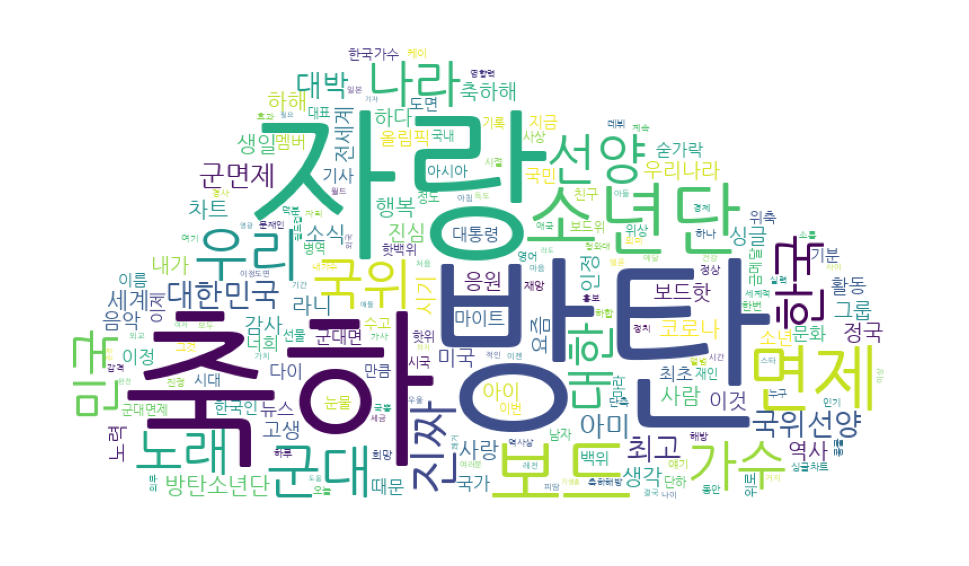

In [98]:
imgWC = wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(6, 4))
plt.imshow(imgWC)
plt.axis('off')

In [92]:
%config InlineBackend.figure_format = 'retina'


# 기말고사 예상

In [103]:
#각 열의 최대값에서 최소값을 뺀 결과
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})
df


,A,B
0,1,10
1,2,20
2,3,30


In [100]:
# 각 열의 최대값에서 최소값을 뺀 결과
print(df.apply(lambda x: x.max() - x.min(), axis=0))

A     2
B    20
dtype: int64


In [104]:
# 각 열의 최대값에서 최소값을 뺀 결과
print(df.apply(lambda x: x.max() - x.min(), axis=1))

0     9
1    18
2    27
dtype: int64


In [105]:
f = lambda x: x + 5
df.apply(f)

,A,B
0,6,15
1,7,25
2,8,35


In [107]:
f = lambda x: x * 5
df.apply(f)#axis =0/1 의미 없음 생략 권장

,A,B
0,5,50
1,10,100
2,15,150


In [110]:
f = lambda x: x / 5
df.apply(f, axis=1)

,A,B
0,0.2,2.0
1,0.4,4.0
2,0.6,6.0


In [102]:
# 각 행의 평균 구하기
print(df.apply(lambda x: x.mean(), axis=1))

0     5.5
1    11.0
2    16.5
dtype: float64


In [111]:
# 각 열의 평균 구하기
print(df.apply(lambda x: x.mean(), axis=0))

A     2.0
B    20.0
dtype: float64


In [112]:
df

,A,B
0,1,10
1,2,20
2,3,30


In [113]:
df.apply(lambda x: x.sum(), axis=0)

,0
A,6
B,60


In [114]:
df.apply(sum, axis=0) #위와 동일

,0
A,6
B,60


In [115]:
df.apply(sum, axis=1)

,0
0,11
1,22
2,33


In [116]:
df.sum() #axis=0과 동일

,0
A,6
B,60


In [117]:
df.sum(axis=1)

,0
0,11
1,22
2,33


In [118]:
import pandas as pd

df = pd.DataFrame({
    'name': ['Alice', 'Bob'],
    'hobbies': [['reading', 'swimming'], ['gaming']]
})
df

,name,hobbies
0,Alice,"[reading, swimming]"
1,Bob,[gaming]


In [119]:
df_exploded = df.explode('hobbies')
df_exploded

,name,hobbies
0,Alice,reading
0,Alice,swimming
1,Bob,gaming


In [132]:
import pandas as pd

df = pd.DataFrame({
    'A': [[1, 2], 3],
    'B': [['a', 'b'], ['c']]
})



TypeError: 'Styler' object is not callable

In [124]:
df.explode(['A'])

,A,B
0,1,"[a, b]"
0,2,"[a, b]"
1,3,[c]


In [129]:
display_side_by_side =

In [130]:
display_side_by_side(df, df.explode(['B']))

TypeError: 'Styler' object is not callable

In [123]:
display_side_by_side(df, df.explode({'A', 'B'}))

NameError: name 'display_side_by_side' is not defined